In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/assignment_Hygwell/traffic.csv")

# Explore the dataset
print(df.head(5))

   event        date       country      city  \
0  click  2021-08-21  Saudi Arabia    Jeddah   
1  click  2021-08-21  Saudi Arabia    Jeddah   
2  click  2021-08-21         India  Ludhiana   
3  click  2021-08-21        France   Unknown   
4  click  2021-08-21      Maldives      Malé   

                              artist          album          track  \
0                             Tesher    Jalebi Baby    Jalebi Baby   
1                             Tesher    Jalebi Baby    Jalebi Baby   
2                      Reyanna Maria      So Pretty      So Pretty   
3  Simone & Simaria, Sebastian Yatra  No Llores Más  No Llores Más   
4                             Tesher    Jalebi Baby    Jalebi Baby   

           isrc                                linkid  
0  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
1  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
2  USUM72100871  23199824-9cf5-4b98-942a-34965c3b0cc2  
3  BRUM72003904  35573248-4e49-47c7-af80-08a960fa74cd  
4  QZNWQ20

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB
None


In [ ]:
print(df.describe())

           event        date       country    city  artist        album  \
count     226278      226278        226267  226267  226241       226273   
unique         3           7           211   11993    2419         3254   
top     pageview  2021-08-19  Saudi Arabia  Jeddah  Tesher  Jalebi Baby   
freq      142015       35361         47334   22791   40841        40841   

              track          isrc                                linkid  
count        226273        219157                                226278  
unique         3562           709                                  3839  
top     Jalebi Baby  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
freq          40841         40841                                 40841  


# Total and Daily Pageview Events
1. How many total pageview events did the links in the dataset receive during the entire period?
2. What is the average number of pageview events per day?


In [ ]:
# Total pageview events
total_pageviews = len(df)

# Convert 'date' to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Average pageview events per day
average_pageviews_per_day = df.groupby(df['date'].dt.date).size().mean()

print(f"Total Pageview Events: {total_pageviews}")
print(f"Average Pageview Events per Day: {average_pageviews_per_day}")

Total Pageview Events: 226278
Average Pageview Events per Day: 32325.428571428572


### Explanation:

- Total Pageviews: We count the occurrences of 'click' events, assuming 'click' represents a pageview. This gives the total number of pageviews during the entire period.
- Average Pageviews per Day: We first convert the 'date' column to datetime format to ensure correct date operations. We then group the data by date to count the number of pageviews per day and calculate the average.

# Analysis of Other Events:
What is the total count and distribution of other recorded events in the dataset?


In [ ]:
# Count the distribution of different event types
event_distribution = df['event'].value_counts()

print(f"Event Distribution:\n{event_distribution}")

Event Distribution:
event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64


## Explanation:

- We used the value_counts() method to determine how many times each type of event ('pageview', 'click', 'preview') occurred in the dataset.

# Geographical Distribution:
Which countries contributed to the pageviews?

In [ ]:
# Countries contributing to pageviews (or clicks)
pageviews_by_country = df.groupby('country').size()

print(f"Pageviews by Country:\n{pageviews_by_country}")

Pageviews by Country:
country
Afghanistan            2
Albania              489
Algeria              676
American Samoa         4
Andorra                3
                    ... 
Wallis and Futuna      2
Yemen                 83
Zambia               135
Zimbabwe              26
Åland                  6
Length: 211, dtype: int64


## Explanation:

- We grouped the data by 'country' and counted the number of pageviews from each country to understand the geographical distribution.

# Click-Through Rate (CTR) Analysis:
1. What is the overall click-through rate (CTR) calculated as clicks/pageviews?
2. How does the CTR vary across different links?

In [ ]:
# Assume 'clicks' are indicated by 'click' in the 'event' column
total_clicks = df[df['event'] == 'click'].shape[0]

# Overall CTR (if each row is a pageview, then clicks/total rows)
overall_ctr = total_clicks / total_pageviews

# CTR by link
ctr_by_link = df[df['event'] == 'click'].groupby('linkid').size() / df.groupby('linkid').size()

print(f"Overall CTR: {overall_ctr}")
print(f"CTR by Link:\n{ctr_by_link}")

Overall CTR: 0.24629880059042417
CTR by Link:
linkid
00073307-ae96-5089-a117-4783afb42f8e         NaN
00126b32-0c35-507b-981c-02c80d2aa8e7    0.500000
0018cfff-50a1-5984-9715-01ef2d11a49a         NaN
0033934b-5d16-5a06-af58-d087bcdd3680         NaN
0034d6cf-3bd8-5ffe-aafc-b3959fc48608         NaN
                                          ...   
fff38ca0-8043-50cd-a5f1-f65ebb7105c5    0.500000
fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7         NaN
fff84c0e-90a1-59d8-9997-adc909d50e16    0.500000
fffc17a7-f935-5d3e-bd3e-d761fd80d479    0.333333
fffd0045-29de-522b-b5d8-35786363bf07    0.333333
Length: 3839, dtype: float64


## Explanation:

- Overall CTR: We calculated the overall CTR by dividing the total number of clicks by the total number of pageviews.
- CTR by Link: For each link, we computed the CTR by dividing the number of clicks by the total number of pageviews for that link.

# Correlation Analysis:
1. Is there a correlation between clicks and previews on a link? If so, is it statistically significant, and how strong is the effect?
2. Perform tests for both potential linear relationships and categorical (binary) relationships between these variables.


In [ ]:
# Group by 'linkid' to get total pageviews and clicks per link
df_summary = df.groupby('linkid').agg(pageviews=('event', 'size'),
                                      clicks=('event', lambda x: (x == 'click').sum()))

# Display the summary DataFrame for verification
print(df_summary.head())

                                      pageviews  clicks
linkid                                                 
00073307-ae96-5089-a117-4783afb42f8e          2       0
00126b32-0c35-507b-981c-02c80d2aa8e7          4       2
0018cfff-50a1-5984-9715-01ef2d11a49a          1       0
0033934b-5d16-5a06-af58-d087bcdd3680          1       0
0034d6cf-3bd8-5ffe-aafc-b3959fc48608          1       0


In [ ]:
# Pearson Correlation Coefficient:

from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient
corr, p_value = pearsonr(df_summary['pageviews'], df_summary['clicks'])

print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.9961979652990269
P-value: 0.0


## Explanation:

- Pearson Correlation Coefficient: Measures the strength and direction of the linear relationship between clicks and pageviews. A value close to 1 or -1 indicates a strong correlation, while a value close to 0 indicates a weak correlation.
- P-value: Determines if the observed correlation is statistically significant. A p-value below 0.05 suggests significance.

### Results:

- Pearson Correlation Coefficient: 0.996 (very strong positive correlation)
- P-value: 0.0 (statistically significant)

In [ ]:
# Chi-Square Test (Categorical Relationship):

from scipy.stats import chi2_contingency

# Create binary columns for pageviews and clicks
df_summary['high_pageviews'] = df_summary['pageviews'] > df_summary['pageviews'].median()
df_summary['has_clicks'] = df_summary['clicks'] > 0

# Create the contingency table
contingency_table = pd.crosstab(df_summary['has_clicks'], df_summary['high_pageviews'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 1031.9421767824772
P-value: 2.047840054211702e-226


## Explanation:

- Chi-Square Test: Assesses if there's a significant association between clicks and high/low pageviews. The contingency table is used to test the independence of the categorical variables.
- Chi-Square Statistic and P-value: The statistic indicates the strength of the association, while the p-value shows if it's statistically significan

### Results:

- Chi-Square Statistic: 1031.94
- P-value: 2.05e-226 (highly significant)

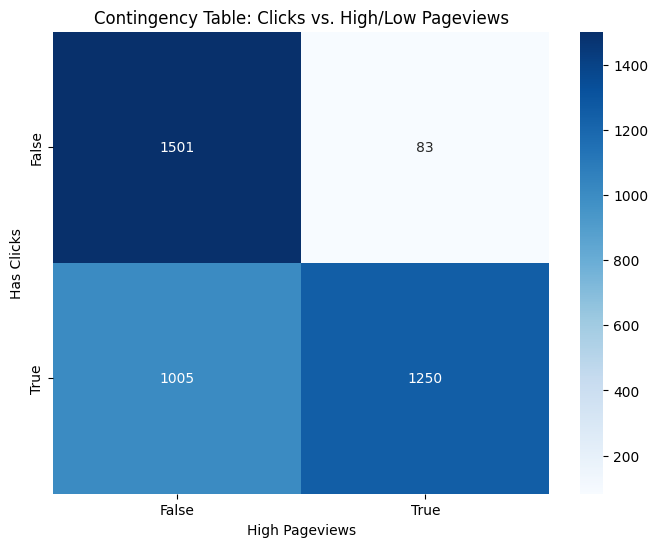

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap for the contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Contingency Table: Clicks vs. High/Low Pageviews')
plt.xlabel('High Pageviews')
plt.ylabel('Has Clicks')
plt.show()

### Explanation:

The heatmap visualizes the contingency table, showing the distribution of clicks versus high or low pageviews.